Start 1:45pm 5/15/2019

Finish 11:25AM 5/16/2019

# Predicting credit default

**ABSTRACT**
This data analysis workflow goes through the process of creating and evaluating a predictive model that tries to determine whether or not someone will experience credit default within two years.


Problem set up

The general strategy to build a predictive model comes in several steps.

* **Loading and evaluating the data**: Here we simply look at the data, examine it's structure and see what kind of problem we have to solve.


* **Framing the question**: After looking at the data structure, it is clear that this is a binary classification with dramatic class imbalance. Thus to solve a problem like this we need to identify usefull features and work with classifiers that can accomodate for imbalanced classes. 93.7% of the people studied wont experience credit default, the remaining will.


* **Identifying features**: Since this is a two class problem, statistical tests can be performed on each feature to see if the distribution of the feature is the same amongst both classes. If the distribution is the same, then the feature is probably useless in predicting credit default. Inconjunction to hypothesis testing, graphical analysis is also performed.


* **Model Construction**: By examining the data in our exploration, we can see that the data is non-linear. This means it's not conveniently separable, and our models should accomodate this. Two common models that work on this kind of data are RandomForestClassifier and Support Vector Machine with a nonlinear kernel. These are then put into an ensemble learning structure mixing the two models. Also, the metrics for evaluation are the ROC-AUC score and the confusion matrix because of the class imbalance. 

*Note the final output to the csv file was just modelled off logisticregression, this is just for demonstration. The ensemble learning technique took a longer time to train and fit, but it it would have been a better model.*

# Finding a story through data

In any problem like this, there is a fundamental limit that the predictive model will give us. Predicting credit default is tricky, and even if we had more predictors our best model would still only have limited ability to predict credit default.

Never the less, we can still make some estimation and get conclusions and what does and what definitely does not predict credit default.

**So what features predict credit default?**

There are several key factors to predict credit default:
* `RevolvingUtilizationOfUnsecuredLines`
* `age`
* `NumberOfTime30-59DaysPastDueNotWorse`
* `NumberOfTimes90DaysLate`
* `NumberOfTime60-89DaysPastDueNotWorse`
* `NumberOfOpenCreditLinesAndLoans`
* `NumberRealEstateLoansOrLines`
* `DebtRatio`

The factors `NumberOfOpenCreditLinesAndLoans`, `NumberRealEstateLoansOrLines` and `DebtRatio` are useful predictors, but not as useful as the others.

**What features aren't useful?**
`NumberOfDependents` and `MonthlyIncome` weren't useful predictors.

How does each feature distribute itsself amongst people who default versus those who dont?

* `RevolvingUtilizationOfUnsecuredLines`: the average value is smaller for deliquents (4.4 vs 6.2)
* `age`: they tend to be younger (46yrs avg for deliquents versus 53 on avg)
* `NumberOfTime30-59DaysPastDueNotWorse`: (2 on avg for deliquents, 0 for non)
* `NumberOfTimes90DaysLate`: (2 on avg for deliquents, 0 for non deliquents)
* `NumberOfTime60-89DaysPastDueNotWorse`: (2 on avg for deliqeunts, 0 for non)
* `DebtRatio`: tend to be smaller for deliquents (295, vs 357)
* `NumberOfOpenCreditLinesAndLoans`: tend to be smaller on average for deliquents (7.8 vs 8.5)

# DATA WORKFLOW 

The following cells are the workflow for the data.

In [22]:
#First we want to load and extract the data

import pandas as pd
train = pd.read_csv('training_data.csv',index_col=0)
test = pd.read_csv('test_data.csv',index_col=0)
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Lets look at it's shape.

In [4]:
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (150000, 11)
Test shape:  (101503, 11)


Do both have the same columns?

In [5]:
test.columns==train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Now lets explore the data to see what the distribution of target classes are like.

In [6]:
100*train['SeriousDlqin2yrs'].value_counts()/len(train)

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

So the classes are very imbalanced. Thus our binary classification model must account for this, and our model performance should not be accuracy. ROC-AUC is a better metric for evaluation.

Out of all our features, which ones are completely irrelevant? We can use graphical analysis and statistical tests to answer this. Lets start with graphical analysis.

RevolvingUtilizationOfUnsecuredLines
Mean for deliquents:  4.367281745003265
Mean for non-deliquents:  6.168855226146488
age
Mean for deliquents:  45.92659086375424
Mean for non-deliquents:  52.751375255404575
NumberOfTime30-59DaysPastDueNotWorse
Mean for deliquents:  2.3884899261919013
Mean for non-deliquents:  0.2801091631302956
DebtRatio
Mean for deliquents:  295.1210663795195
Mean for non-deliquents:  357.1511677387176
MonthlyIncome
Mean for deliquents:  5630.82649276056
Mean for non-deliquents:  6747.837774322682
NumberOfOpenCreditLinesAndLoans
Mean for deliquents:  7.88230600438859
Mean for non-deliquents:  8.493620243759555
NumberOfTimes90DaysLate
Mean for deliquents:  2.0913624576102134
Mean for non-deliquents:  0.13522511323531514
NumberRealEstateLoansOrLines
Mean for deliquents:  0.9885298224615998
Mean for non-deliquents:  1.0203680683555518
NumberOfTime60-89DaysPastDueNotWorse
Mean for deliquents:  1.8280470775982445
Mean for non-deliquents:  0.12666638089930987
NumberOfDep

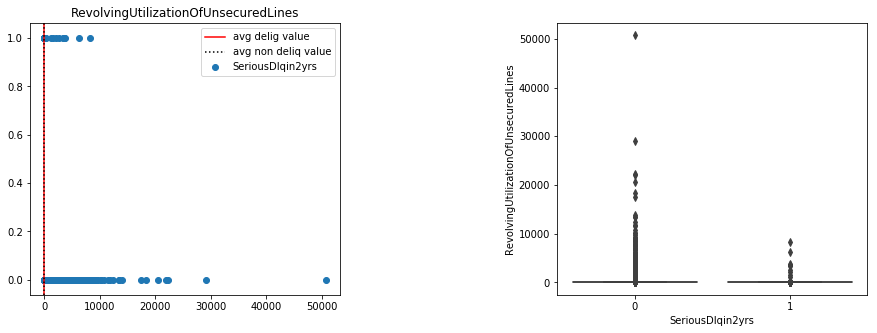

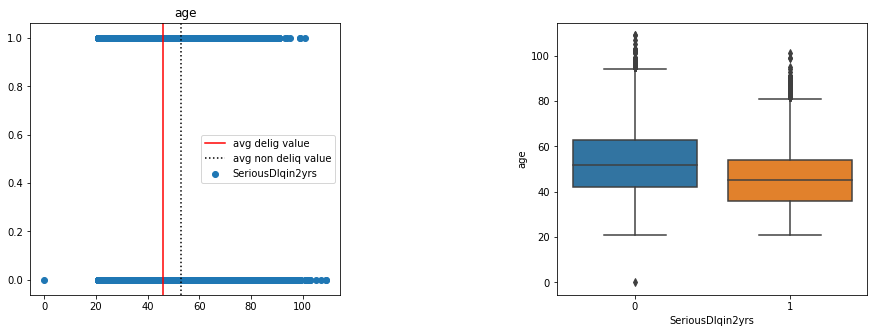

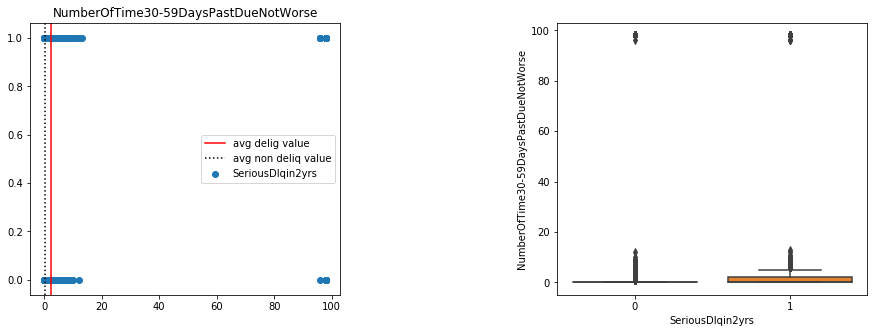

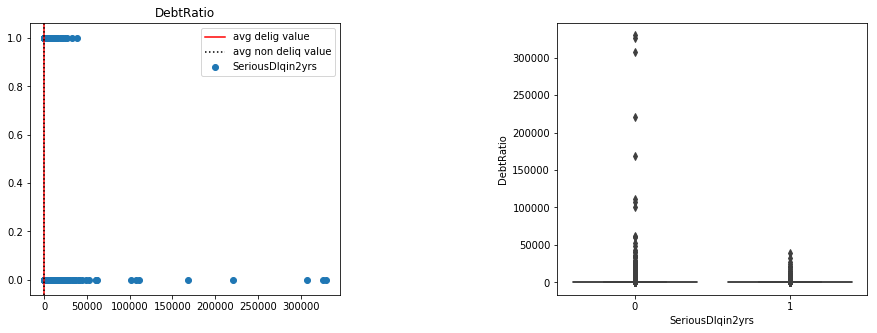

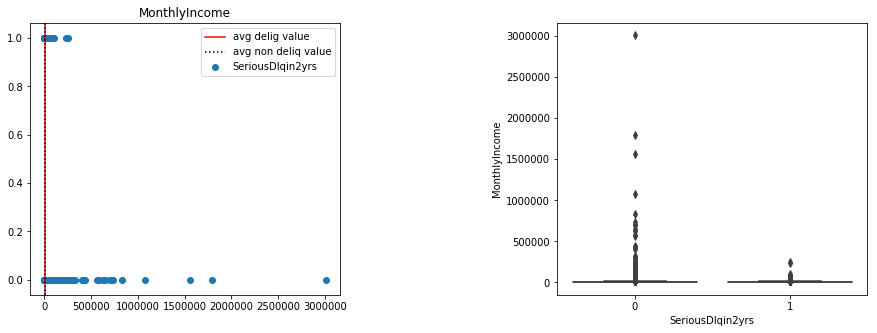

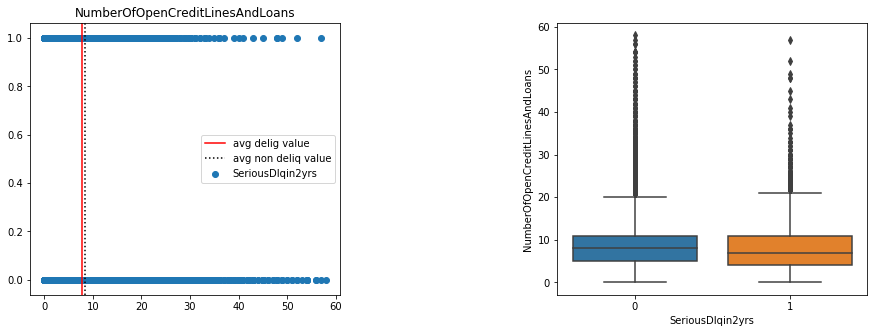

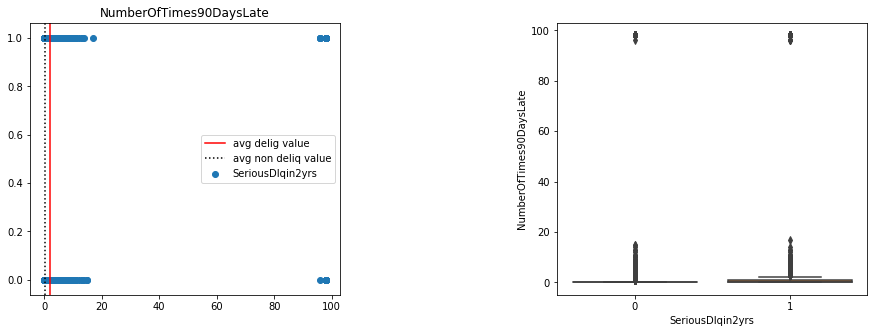

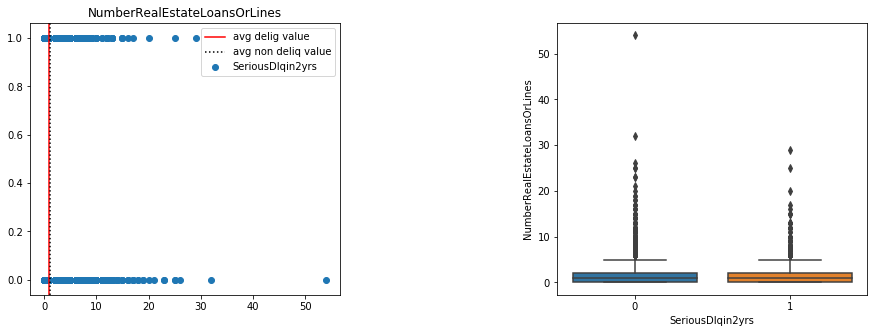

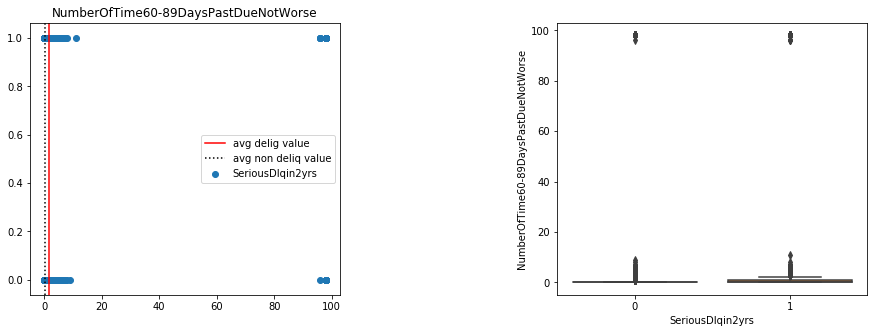

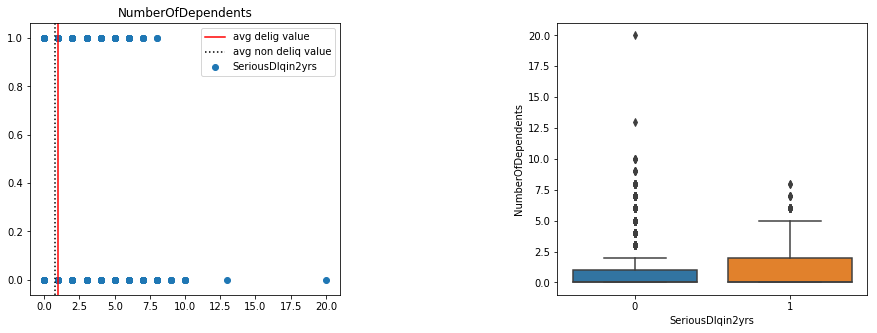

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

for i in train.columns:
    if i!='SeriousDlqin2yrs':
        plt.figure(figsize=(15,5))
        mean = np.mean(train[train['SeriousDlqin2yrs']==1][i])
        mean2 =  np.mean(train[train['SeriousDlqin2yrs']==0][i])
        print(i)
        print("Mean for deliquents: ",mean)
        print("Mean for non-deliquents: ",mean2)
        plt.subplot(1,2,1)
        plt.title(i)
        plt.scatter(train[i],train['SeriousDlqin2yrs'])
        plt.axvline(mean,color='r',label='avg delig value')
        plt.axvline(mean2,color='black',linestyle=':',label='avg non deliq value')
        plt.legend()
        plt.subplot(1,2,2)
        sns.boxplot(x='SeriousDlqin2yrs', y=i,data=train)
        plt.subplots_adjust(wspace=0.7)
plt.show()

The graphs above indicates that some features with average equal values in both classes. Others dont. In conjunction, it's obvious that boundary of separation is not linear. So our models should later accomodate for this.

What should be done next is a hypothesis test to see if the distribution of each feature is the same amongst both classes. If they are the same, the feature is worthless in predicting when someone will be deliquent.

However to perform a hypothesis test we must choose the correct test to use. To do this, we must examine the distribution of the feature in the data.

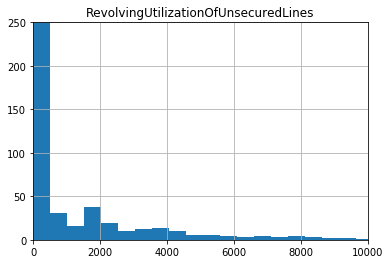

In [12]:
j=1
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=100)
plt.xlim(0,10000)
plt.ylim(0,250)
plt.show()

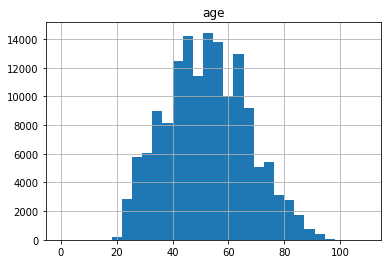

In [13]:
j=2
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=30)
plt.show()

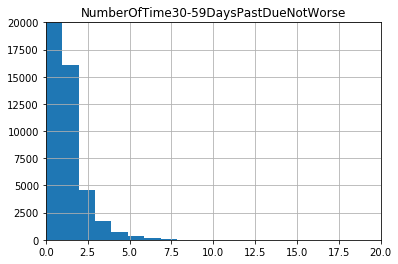

In [14]:
j=3
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=100)
plt.xlim(0,20)
plt.ylim(0,20000)
plt.show()

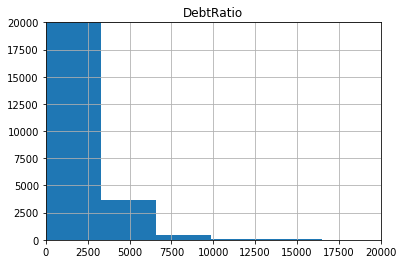

In [15]:
j=4
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=100)
plt.ylim(0,20000)
plt.xlim(0,20000)
plt.show()

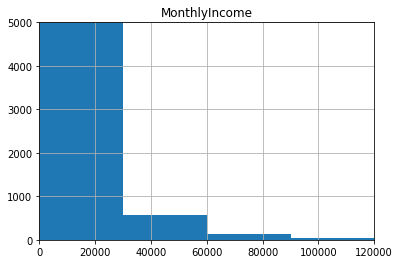

In [17]:
j=5
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=100)
plt.ylim(0,5000)
plt.xlim(0,120000)
plt.show()

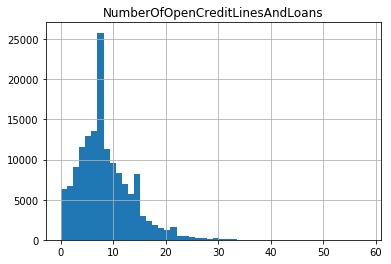

In [18]:
j=6
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=50)
#plt.ylim(0,2500)
#plt.xlim(0,120000)
plt.show()

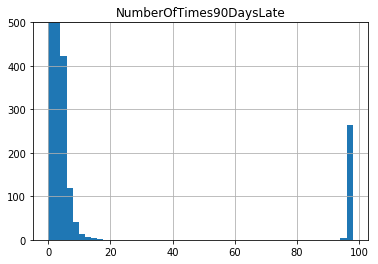

In [19]:
j=7
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=50)
plt.ylim(0,500)
#plt.xlim(0,120000)
plt.show()

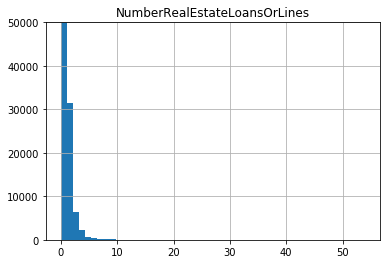

In [20]:
j=8
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=50)
plt.ylim(0,50000)
#plt.xlim(0,120000)
plt.show()

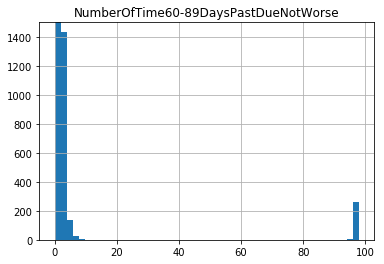

In [21]:
j=9
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=50)
plt.ylim(0,1500)
#plt.xlim(0,120000)
plt.show()

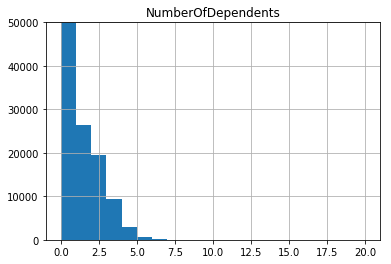

In [22]:
j=10
plt.title(train.columns[j])
train[train.columns[j]].hist(bins=20)
plt.ylim(0,50000)
#plt.xlim(0,120000)
plt.show()

Now we can see that most of these features have an exponential distribution, or something close to it. Thus if we're going to use a hypothesis test to determine if a feature is redundant, we cannot assume the data is normal. 

Hence, we can use the Kruskal wallis test in a bootstrap structure.

The process is as follows, for each feature:    
1. Take a random sample of 1000 rows of the target class is 1 and 1000 rows where the target class is 0.

2. Perform the Kruskal wallis test on both samples.

3. Repeat the kurskal wallis test 1000 times, and each time taking 1000 random samples of both classes.

4. See what percentage of the time we fail to reject the null hypothesis.

5. If the vast majority of the time we fail to reject the null hypothesis, then the feature is probably useless and should be ignored.

In [23]:
from scipy import stats
from scipy.stats import chi2
import random


def kruskal(i,k):
    k = random.randint(1,100)
    X = train[train['SeriousDlqin2yrs']==1][i].sample(1000,random_state=k)
    y = train[train['SeriousDlqin2yrs']==0][i].sample(1000,random_state=k)
    critical = chi2.ppf(0.95,1)
    H_test = stats.kruskal(X,y)
    if (H_test[0]>critical) & (H_test[1]<0.05):
        return "reject Null"
    else:
        return "Fail to reject"
    
    
def Kruskal_test_Feature(i,n):
    l = []
    for number in range(n):
        k = random.randint(1,100)
        l.append(kruskal(i,k))
    keep_null = str(100*l.count('Fail to reject')/len(l))
    print(i)
    print("Keep null in "+keep_null+" percentage of samples")
    print('\n')
    
    
for i in train.columns:
    if i!='SeriousDlqin2yrs':
        Kruskal_test_Feature(i,1000)

RevolvingUtilizationOfUnsecuredLines
Keep null in 0.0 percentage of samples


age
Keep null in 0.0 percentage of samples


NumberOfTime30-59DaysPastDueNotWorse
Keep null in 0.0 percentage of samples


DebtRatio
Keep null in 54.1 percentage of samples


MonthlyIncome
Keep null in 100.0 percentage of samples


NumberOfOpenCreditLinesAndLoans
Keep null in 4.0 percentage of samples


NumberOfTimes90DaysLate
Keep null in 0.0 percentage of samples


NumberRealEstateLoansOrLines
Keep null in 14.1 percentage of samples


NumberOfTime60-89DaysPastDueNotWorse
Keep null in 0.0 percentage of samples


NumberOfDependents
Keep null in 100.0 percentage of samples




So considering these results, `MonthlyIncome` and `NumberOfDependents`  are useless features, and add zero value to predictability. Thus we drop those from the training data.

Hence the relevant columns to predict whether or not someone will be deliquent in 2 years are;

* `RevolvingUtilizationOfUnsecuredLines`
* `age`
* `NumberOfTime30-59DaysPastDueNotWorse`,
* `DebtRatio`
* `NumberOfOpenCreditLinesAndLoans`
* `NumberOfTimes90DaysLate`
* `NumberRealEstateLoansOrLines`
* `NumberOfTime60-89DaysPastDueNotWorse`

In [26]:
train.drop(['MonthlyIncome','NumberOfDependents'],axis=1,inplace=True)

# Predictive Modelling

This is a binary classification problem with severly imbalanced classes. Hence, our metric for model evaluation will be based upon the ROC-AUC score and the confusion matrix.

To build a model, we must prepare the data from scaling it.

In [27]:
from sklearn.preprocessing import StandardScaler


X = train.drop('SeriousDlqin2yrs',axis=1)
X_target = test.drop(['SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents'],axis=1)
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X),columns=X.columns)
X_target = pd.DataFrame(SS.fit_transform(X_target),columns=X_target.columns)

X = X.dropna()
X_target = X_target.dropna()

y = train['SeriousDlqin2yrs']

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Several approaches will be used

In [28]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

def model_evaluate(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:,1]
    y_prob_train = model.predict_proba(X_train)[:,1]
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    logloss_test = log_loss(y_test,y_prob_test)
    logloss_train = log_loss(y_train,y_prob_train)
    
    print(classification_report(y_test,y_pred))
    print("ROC AUC score: ",roc_auc)
    print("Confusion matrix: \n",)
    print(confusion_matrix(y_test,y_pred))
    print("Log loss test: ",logloss_test)
    print("Log loss train: ",logloss_train)
    print('\n')
    print("Actual confusion matrix: \n")
    print(confusion_matrix(y_test,y_test))

How did logistic regression perform?

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model_evaluate(logreg)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     46191
           1       0.57      0.04      0.07      3309

   micro avg       0.93      0.93      0.93     49500
   macro avg       0.75      0.52      0.52     49500
weighted avg       0.91      0.93      0.91     49500

ROC AUC score:  0.7005405649459537
Confusion matrix: 

[[46093    98]
 [ 3178   131]]
Log loss test:  0.22468803580189725
Log loss train:  0.22645194166783522


Actual confusion matrix: 

[[46191     0]
 [    0  3309]]


**How about Randomforest classifier?**

In [29]:
model_evaluate(RandomForestClassifier(n_estimators=1000,class_weight='balanced'))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     46191
           1       0.50      0.17      0.25      3309

   micro avg       0.93      0.93      0.93     49500
   macro avg       0.72      0.58      0.61     49500
weighted avg       0.91      0.93      0.92     49500

ROC AUC score:  0.8366874998556555
Confusion matrix: 

[[45622   569]
 [ 2744   565]]
Log loss test:  0.20004672911481788
Log loss train:  0.04567928479929133


Actual confusion matrix: 

[[46191     0]
 [    0  3309]]


**Support Vector Machine's performance'**

In [72]:
model_evaluate(SVC(class_weight='balanced',gamma='scale',kernel='rbf',probability=True))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     46191
           1       0.24      0.68      0.35      3309

   micro avg       0.83      0.83      0.83     49500
   macro avg       0.60      0.76      0.63     49500
weighted avg       0.92      0.83      0.87     49500

ROC AUC score:  0.8235882970560063
Confusion matrix: 

[[38918  7273]
 [ 1071  2238]]
Log loss test:  0.19406748240632427
Log loss train:  0.19304516184195303


Actual confusion matrix: 

[[46191     0]
 [    0  3309]]


**Ensemble learning**

So SVM classifier tends to overshoot the number of predicted deliquents and random forest tends to underestimate. Thus we can combine these models together in an ensemble.

In [30]:
from sklearn.ensemble import VotingClassifier
SVM = SVC(class_weight='balanced',gamma='scale',kernel='rbf',probability=True)
RF = RandomForestClassifier(n_estimators=1000,class_weight='balanced')

voting_clf = VotingClassifier(estimators=[('RF',RF),('SVM',SVM)],
                              weights=[3,1],voting='soft')

In [81]:
model_evaluate(voting_clf)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     46191
           1       0.55      0.17      0.25      3309

   micro avg       0.94      0.94      0.94     49500
   macro avg       0.75      0.58      0.61     49500
weighted avg       0.92      0.94      0.92     49500

ROC AUC score:  0.8430823932679595
Confusion matrix: 

[[45739   452]
 [ 2763   546]]
Log loss test:  0.18656830693653337
Log loss train:  0.06615838664531916


Actual confusion matrix: 

[[46191     0]
 [    0  3309]]


To perform this analysis, I would use the ensemble learning technique that combines random forest and support vector machine. This is because support vector machine over estimates and randorm forest underestimates and both work well with nonlinear data.

In [ ]:
voting_clf.fit(X,y)
prediction_probability=pd.DataFrame(voting_clf.predict_proba(X_target)[:,1])
prediction_probability.reset_index(inplace=True)
prediction_probability['index'] = prediction_probability['index'].apply(lambda x: x+1)
prediction_probability.columns = ['ID','Probability']
prediction_probability.to_csv('output.csv')

However, using the ensemble learning technique on this much data consumed a huge amount of time. Thus put the "output.csv" file as requested, I'll just use logistic regression for demonstration.

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
prediction_probability=pd.DataFrame(logreg.predict_proba(X_target)[:,1])
prediction_probability.reset_index(inplace=True)
prediction_probability['index'] = prediction_probability['index'].apply(lambda x: x+1)
prediction_probability.columns = ['ID','Probability']
prediction_probability.to_csv('output.csv')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
